In [2]:
using Plots
using Gnuplot

In [3]:
Gnuplot.options.term = "pngcairo"

"pngcairo"

In [4]:
include("./hgt_parse.jl")
include("./poly_fixed_grid.jl")
include("./stl_format.jl")
include("./geo_coords_bounds.jl")
include("./poly_fixed_grid.jl")

get_base_triangles (generic function with 1 method)

In [25]:
center=[36.082752, -112.041425]
box_size=1600
coords = bounding_box_coords(center,160,160)
filename = get_filename_from_coords(center)
tiles,fn_tiles = get_tile_filenames_from_coords(coords)
println(fn_tiles)

["hgt_data/n36w113.hgt"]


In [26]:
# get rid of the overlapping rows/columsn
for i in 1:size(tiles,1)
    for j in 1:size(tiles,2)-1
        tiles[i,j] = tiles[i,j][:,1:end .!=end]
    end
end

for j in 1:size(tiles,2)
    for i in 1:size(tiles,1)-1
        tiles[i,j] = tiles[i,j][1:end .!=end,:]
    end
end

In [27]:
# stack the tiles horizontally, then vertically
hcatted = Array{Array{Int16,2}}(undef,0)
for i in 1:size(tiles[:,1],1)
    append!(hcatted,[hcat(tiles[i,:]...)])
end

master_tile = vcat(hcatted...)

3601×3601 Array{Int16,2}:
 1942  1937  1935  1934  1933  1930  …  2163  2156  2148  2142  2145  2152
 1938  1934  1933  1932  1929  1926     2148  2139  2137  2130  2136  2142
 1937  1933  1934  1933  1931  1929     2122  2120  2114  2127  2124  2144
 1942  1936  1936  1935  1934  1932     2127  2114  2111  2125  2143  2144
 1945  1941  1939  1938  1937  1935     2114  2108  2099  2097  2128  2144
 1949  1944  1943  1941  1939  1936  …  2087  2130  2089  2089  2090  2129
 1951  1948  1947  1944  1942  1939     2074  2070  2085  2080  2066  2091
 1951  1950  1948  1946  1944  1943     2031  2046  2050  2050  2036  2067
 1951  1949  1949  1947  1946  1945     2005  2008  2010  2002  2000  2037
 1951  1949  1949  1948  1947  1947     1984  1987  1983  1975  1955  2001
 1951  1950  1949  1948  1948  1947  …  1964  1966  1959  1954  1943  1956
 1951  1950  1949  1949  1949  1948     1938  1940  1941  1928  1920  1944
 1951  1949  1949  1949  1950  1950     1906  1907  1903  1895  1885  1921

In [28]:
sliced_data = slice_data(master_tile,coords)

161×161 Array{Int16,2}:
 1282  1278  1276  1275  1277  1278  …  1154  1161  1167  1171  1172  1170
 1281  1278  1274  1272  1272  1272     1153  1158  1163  1169  1172  1170
 1279  1275  1271  1269  1268  1266     1147  1151  1154  1161  1166  1167
 1275  1272  1268  1264  1262  1262     1142  1145  1150  1156  1160  1161
 1274  1270  1266  1263  1260  1259     1139  1142  1146  1151  1153  1152
 1277  1272  1268  1263  1260  1257  …  1137  1140  1140  1145  1145  1144
 1281  1274  1268  1263  1260  1257     1137  1138  1140  1142  1144  1142
 1281  1273  1267  1261  1257  1256     1136  1139  1140  1142  1142  1141
 1277  1270  1264  1258  1253  1253     1133  1136  1138  1140  1140  1139
 1268  1266  1260  1255  1248  1250     1125  1129  1134  1137  1136  1135
 1260  1259  1255  1249  1244  1245  …  1091  1109  1123  1129  1136  1135
 1255  1253  1250  1246  1242  1242     1052  1062  1091  1111  1130  1136
 1252  1250  1247  1243  1240  1241     1034  1050  1075  1098  1118  1130
 

In [29]:
# write data to temporary binary file to plot with gnuplot which is slightly better for large tiles
data=sliced_data
(path,io) = mktemp()
for j in 1:size(data,1)
    for i in 1:size(data,2)
        write(io,convert(Int32,i))
        write(io,convert(Int32,j))
        write(io,convert(Int32,data[j,i]))
    end
end
close(io)

n = size(data,1)*size(data,2)

25921

In [30]:
gpsource = " '$path'binary record=$n format='%int%int%int' u 1:2:3 "
@gp "set size ratio -1" "plot $gpsource with image"
save(term="pngcairo size 500,500", output="../dynafresh/plot.png")

In [31]:
center = [41.404607, -122.198942] # Mt. Shasta
box_size = 200 # size in integer arcsec
coords = bounding_box_coords(center,box_size,box_size)
filename = get_filename_from_coords(center)
data = parse_hgt(filename)
println(filename)

sliced_data = slice_data(data,coords)

hgt_data/n41w123.hgt


201×201 Array{Int16,2}:
 2594  2594  2587  2580  2579  2581  …  2601  2600  2599  2597  2597  2599
 2611  2614  2609  2600  2596  2597     2608  2607  2605  2605  2605  2605
 2628  2628  2630  2623  2618  2615     2618  2614  2611  2612  2611  2613
 2637  2643  2647  2649  2647  2640     2626  2622  2621  2622  2622  2621
 2654  2662  2668  2672  2672  2662     2635  2630  2628  2628  2627  2625
 2664  2674  2682  2686  2689  2687  …  2646  2642  2635  2629  2625  2617
 2674  2686  2691  2694  2699  2703     2647  2644  2638  2627  2615  2599
 2684  2693  2701  2707  2714  2720     2635  2633  2626  2618  2605  2591
 2694  2703  2714  2722  2730  2731     2624  2615  2607  2599  2591  2580
 2697  2710  2722  2730  2737  2743     2606  2596  2588  2577  2565  2558
 2700  2718  2726  2734  2746  2752  …  2597  2582  2568  2552  2534  2526
 2707  2721  2732  2745  2758  2763     2572  2559  2549  2537  2521  2511
 2715  2728  2741  2751  2759  2766     2556  2545  2534  2523  2510  2495
 

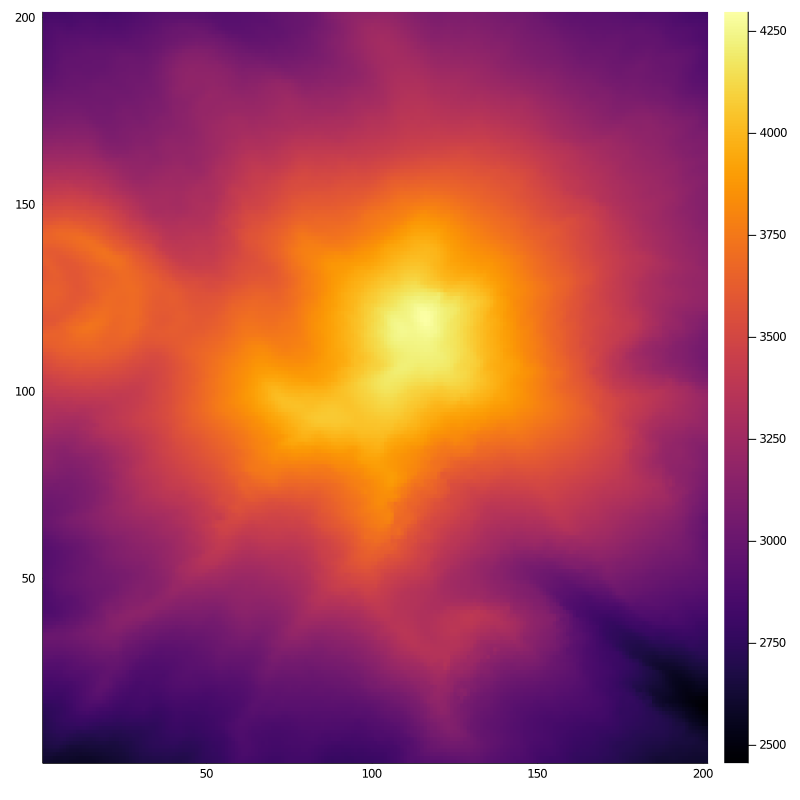

In [32]:
heatmap(sliced_data,
        size = (800, 800),
)

In [33]:
center = [-23.292418, -67.619542] # Cerro Pili
box_size = 50 # size in integer arcsec
coords = bounding_box_coords(center,box_size,box_size)
filename = get_filename_from_coords(center)
data = parse_hgt(filename)
println(filename)
sliced_data = slice_data(data,coords)

hgt_data/s24w068.hgt


51×51 Array{Int16,2}:
 5352  5364  5374  5388  5404  5413  …  5428  5424  5417  5410  5404  5391
 5365  5379  5394  5408  5421  5433     5442  5435  5433  5424  5414  5404
 5374  5389  5405  5419  5434  5447     5460  5451  5445  5436  5426  5413
 5384  5400  5413  5427  5444  5460     5472  5465  5456  5443  5433  5425
 5395  5409  5425  5440  5454  5469     5488  5481  5470  5456  5448  5439
 5407  5422  5438  5451  5466  5477  …  5510  5500  5484  5474  5464  5449
 5420  5435  5449  5461  5474  5487     5528  5516  5500  5488  5479  5465
 5432  5447  5455  5468  5483  5500     5541  5527  5517  5503  5491  5479
 5438  5452  5462  5475  5494  5515     5552  5537  5528  5520  5503  5491
 5444  5459  5474  5488  5509  5533     5562  5550  5539  5535  5524  5504
 5453  5469  5486  5502  5524  5547  …  5580  5566  5557  5546  5537  5518
 5466  5480  5495  5518  5542  5558     5599  5584  5570  5557  5548  5533
 5479  5493  5509  5523  5544  5563     5615  5606  5587  5568  5557  5539
   

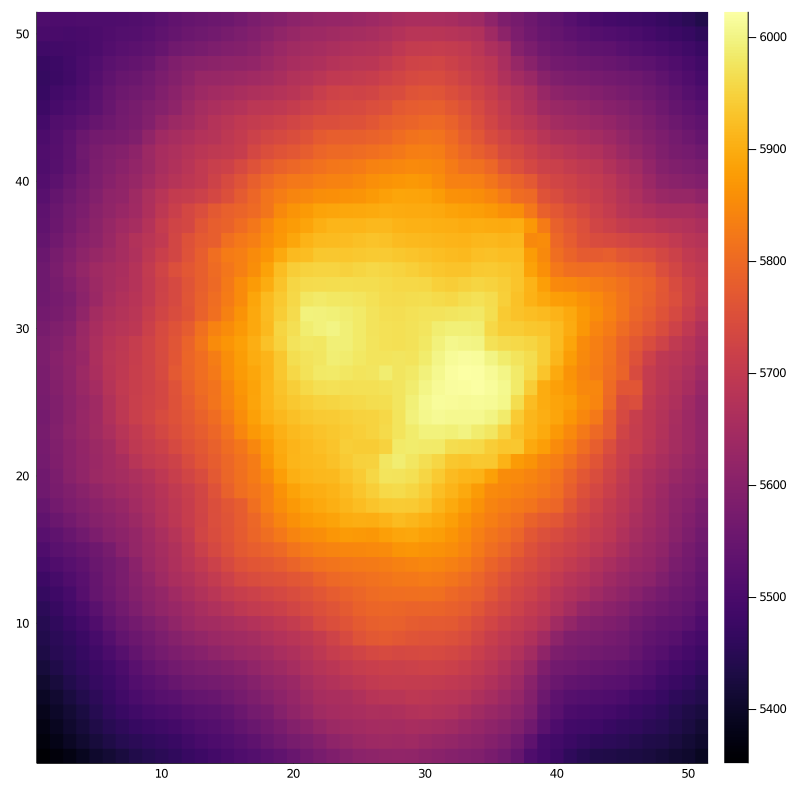

In [34]:
heatmap(sliced_data,
        size = (800, 800),
)

In [35]:
center = [-33.935047, 18.389248] # Lions Head, Cape Town
box_size = 100 # size in integer arcsec
coords = bounding_box_coords(center,box_size,box_size)
filename = get_filename_from_coords(center)
data = parse_hgt(filename)
println(filename)

sliced_data = slice_data(data,coords)

hgt_data/s34e018.hgt


101×101 Array{Int16,2}:
 0  0  0   0  0  0   0   0   0   0   8  …  424  421  417  412  405  397  393
 0  0  0   0  0  0   0   0   0   0   7     412  405  399  396  388  381  377
 0  0  0   0  0  0   0   0   0   0   8     399  395  390  382  372  365  364
 0  0  0   0  0  0   0   0   0   0   8     390  385  378  366  359  358  358
 0  0  0   0  0  0   0   0   0   0  10     380  374  365  357  354  353  352
 0  0  0   0  0  0   0   0   0   0  12  …  371  365  359  353  348  345  341
 0  0  0   0  0  0   0   0   0   0  12     365  362  355  345  338  334  328
 0  0  0   0  0  0   0   0   0   9  12     363  359  350  335  328  323  316
 0  0  0   0  0  0   0   0   0  11  14     356  351  340  330  320  313  306
 0  0  0   0  0  0   0   0   8  11  13     347  340  332  323  313  305  300
 1  1  2   1  1  1   3   5   9  11  13  …  338  334  327  316  305  298  293
 1  2  2   2  2  4   6   8  11  13  16     328  324  320  308  298  291  287
 2  3  4   5  6  8  10  12  16  19  23     315  311 

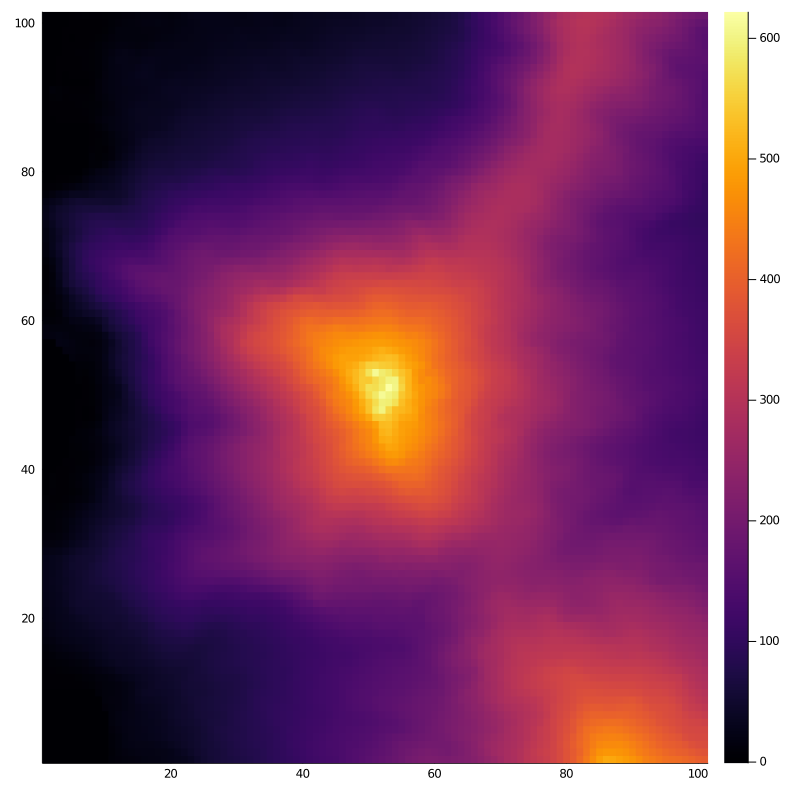

In [36]:
heatmap(sliced_data,
        size = (800, 800),
)

In [77]:
center = [35.362729, 138.730627] # Mt. Fuji
box_size = 300 # size in integer arcsec
coords = bounding_box_coords(center,box_size,box_size)
filename = get_filename_from_coords(center)
data = parse_hgt(filename)
println(filename)

sliced_data = slice_data(data,coords)

hgt_data/n35e138.hgt


301×301 Array{Int16,2}:
 1321  1328  1333  1336  1338  1341  …  1627  1623  1620  1618  1616  1616
 1324  1330  1336  1339  1342  1343     1629  1626  1624  1621  1619  1615
 1325  1332  1338  1343  1344  1346     1634  1633  1630  1627  1622  1616
 1327  1331  1337  1342  1345  1347     1639  1637  1634  1630  1624  1618
 1329  1332  1336  1342  1345  1349     1643  1641  1637  1631  1625  1621
 1335  1335  1338  1344  1348  1352  …  1646  1644  1641  1634  1628  1624
 1338  1340  1342  1345  1349  1353     1648  1646  1643  1639  1633  1630
 1338  1342  1345  1349  1352  1356     1653  1650  1646  1643  1641  1638
 1340  1342  1346  1350  1354  1358     1659  1657  1652  1649  1648  1645
 1341  1344  1347  1351  1354  1357     1665  1662  1659  1657  1656  1652
 1342  1344  1348  1353  1356  1358  …  1668  1665  1664  1663  1662  1657
 1343  1346  1350  1355  1359  1359     1673  1671  1669  1670  1669  1665
 1347  1348  1351  1355  1358  1360     1681  1680  1677  1676  1675  1673
 

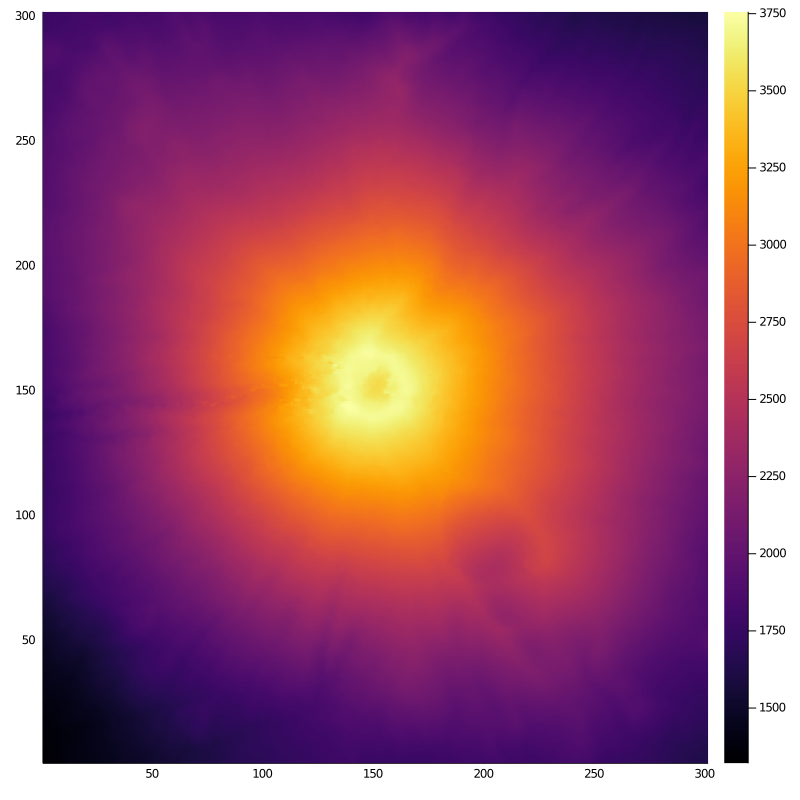

In [78]:
heatmap(sliced_data,
        size = (800, 800),
)

In [97]:
layer_height=100
delta = maximum(sliced_data)-minimum(sliced_data)
offset = minimum(sliced_data)
n_layers = trunc(delta/layer_height)
for k in 1:convert(Int64,n_layers)
    for (i,el) in enumerate(sliced_data)
        if offset+layer_height*(k-1) <= el < offset+layer_height*k  
            flattened_val = offset+layer_height*(k-1)
            sliced_data[i] = flattened_val
        end
    end
end


In [98]:
layers = Array{Array{Array{Int64,1},1},1}(undef,convert(Int64,n_layers))
for i in 1:convert(Int64,n_layers)
    layers[i] = Array{Array{Int64,1},1}(undef,0)
end

for k in 1:convert(Int64,n_layers)
    for i in 1:size(sliced_data,1)
        for j in 1:size(sliced_data,2)
            if offset+layer_height*(k-1) <= sliced_data[i,j] < offset+layer_height*k  
                push!(layers[k],[i,j])
            end
        end
    end
end

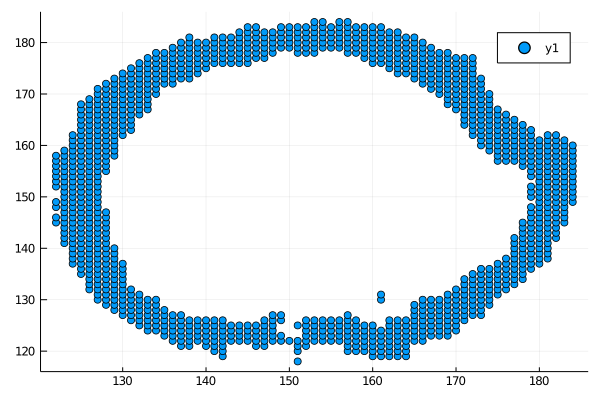

In [99]:
x = [i for (i,j) in layers[22]]
y = [j for (i,j) in layers[22]]
scatter(x,y)

In [116]:
function get_edge(layer::Array{Array{Int64,1},1})
    edges = Array{Array{Int64,1},1}(undef,0)
    for pt in layer
        (i,j) = pt
        
        n_adj = 0
        for adj in layer
            ii,jj = adj
            
            if ii == i+1 && jj == j
            n_adj+=1
                
            elseif ii == i-1 && jj == j
            n_adj+=1
                
            elseif ii == i && jj == j+1
            n_adj+=1
                
            elseif ii == i && jj == j-1
            n_adj+=1
                
            end
        end
        if n_adj < 4
            push!(edges,pt)
        end
    end
    return edges
end


edge = get_edge(layers[20])

504-element Array{Array{Int64,1},1}:
 [111, 154]
 [111, 155]
 [111, 156]
 [111, 157]
 [111, 158]
 [111, 159]
 [111, 160]
 [111, 161]
 [111, 162]
 [111, 163]
 [111, 164]
 [111, 165]
 [111, 166]
 ⋮
 [195, 154]
 [195, 155]
 [195, 156]
 [195, 157]
 [195, 158]
 [195, 160]
 [195, 161]
 [195, 162]
 [195, 163]
 [195, 164]
 [195, 165]
 [195, 166]

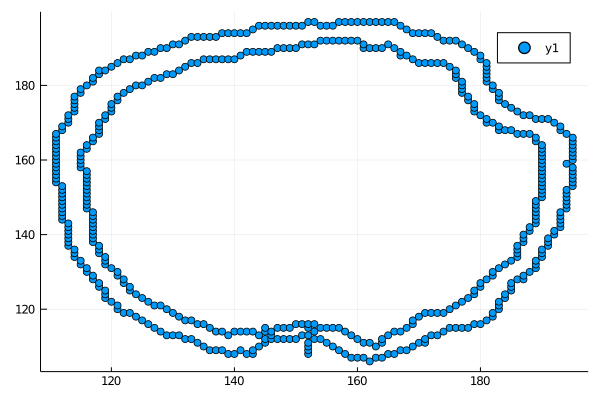

In [117]:
x = [i for (i,j) in edge]
y = [j for (i,j) in edge]
scatter(x,y)

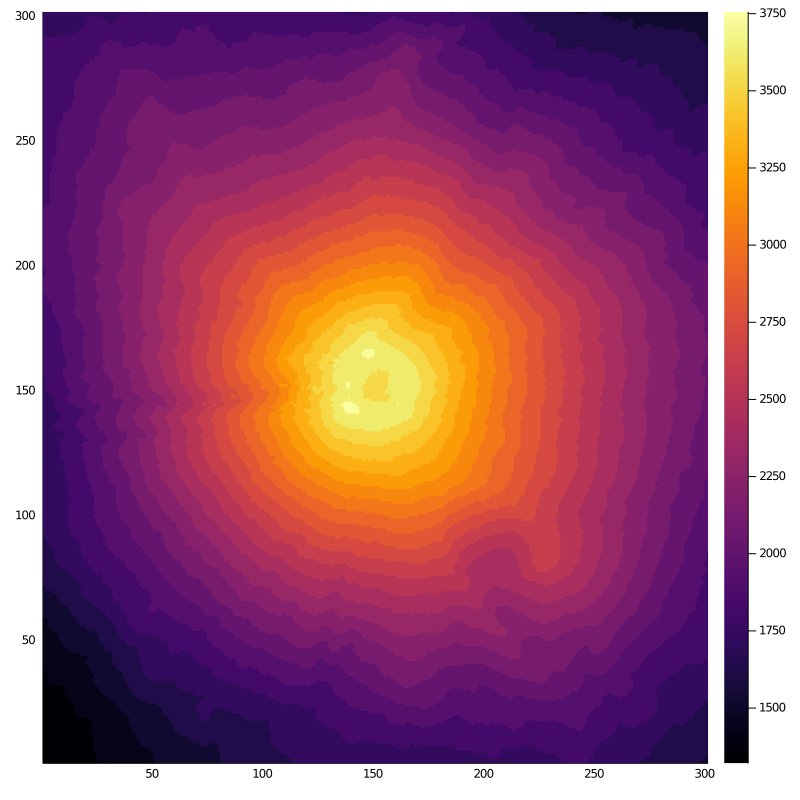

In [100]:
heatmap(sliced_data,
        size = (800, 800),
)

In [10]:
offset=convert(Float64,minimum(sliced_data)) - 10  # NaN occurs if offset equals the minimum value

mesh_triangles = get_mesh_triangles(sliced_data)
side_triangles = get_side_triangles(sliced_data,offset)
base_triangles = get_base_triangles(sliced_data,offset)


triangles = cat(base_triangles,cat(mesh_triangles,side_triangles,dims=1),dims=1)

println("Writing triangles to file...")
write_stl_binary("out.stl",triangles)
println("Done writing triangles to file...")

Writing triangles to file...
Done writing triangles to file...
